

**Project Title:** Sentiment Analysis of Movie Reviews using TF-IDF and Machine Learning

**Background / Context:**
Customers frequently leave reviews on movies, products, and services. These reviews contain valuable insights into public opinion. However, manually analyzing thousands of reviews is time-consuming and inefficient. Businesses and platforms need automated systems to understand whether a review expresses positive or negative sentiment.

**Problem Statement:**
To automatically classify a movie review as **positive** or **negative** using **text-based machine learning**. The system should learn patterns from textual data (reviews) and make predictions that help in understanding audience sentiment.

**Goals / Objectives:**

1. Preprocess textual data to remove noise and standardize input.
2. Convert text into numerical features using **TF-IDF vectorization**.
3. Train machine learning models (e.g., Logistic Regression, SVM, Random Forest) to classify sentiment.
4. Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.
5. Build a simple interactive system (optional) where users can input a review and get predicted sentiment.

**Importance / Impact:**

* Automates sentiment understanding for businesses and platforms.
* Helps in quick analysis of large-scale reviews.
* Enhances customer feedback analysis and product improvement strategies.



In [5]:
 import pandas as pd


In [6]:
# Load CSV dataset
df = pd.read_csv("IMDB Dataset.csv")  # Replace path if stored elsewhere

# Display first 5 rows
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [9]:
# Dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Class distribution
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Column names
print("Columns:", df.columns)


Dataset shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average review length: 231.15694


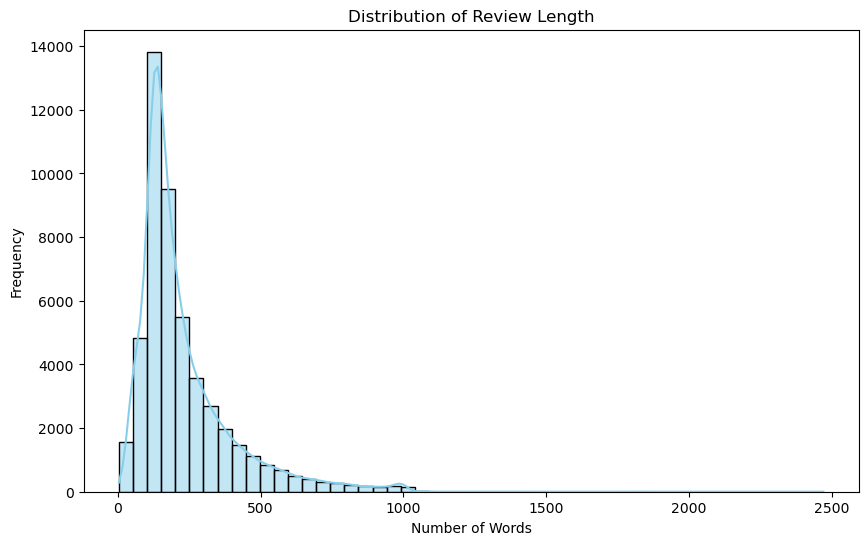

In [13]:
# Add a new column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Average review length
print("Average review length:", df['review_length'].mean())

# Review length distribution
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Review Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


C:\Users\Sidhant\AppData\Local\Temp\ipykernel_18360\3641220673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')


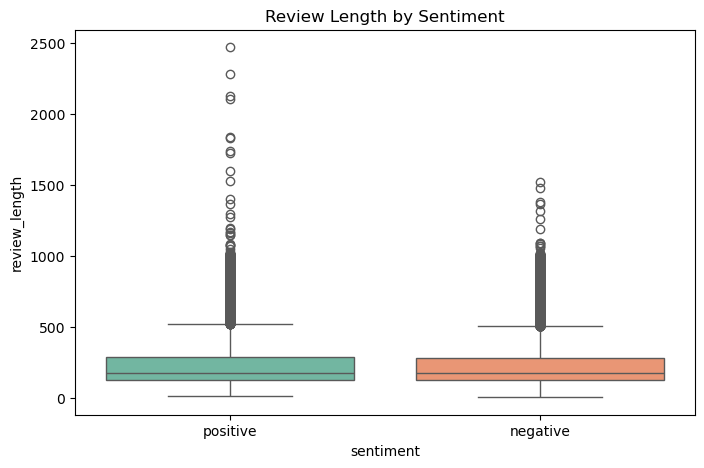

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.title("Review Length by Sentiment")
plt.show()


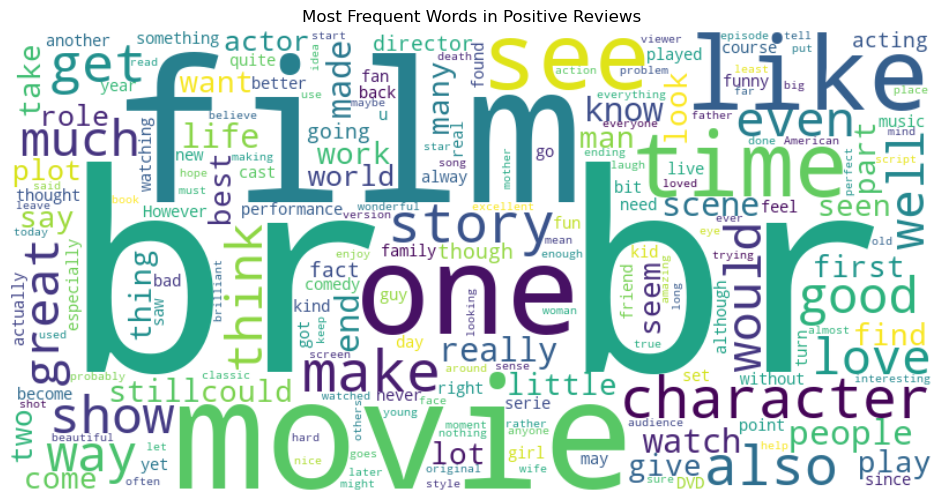

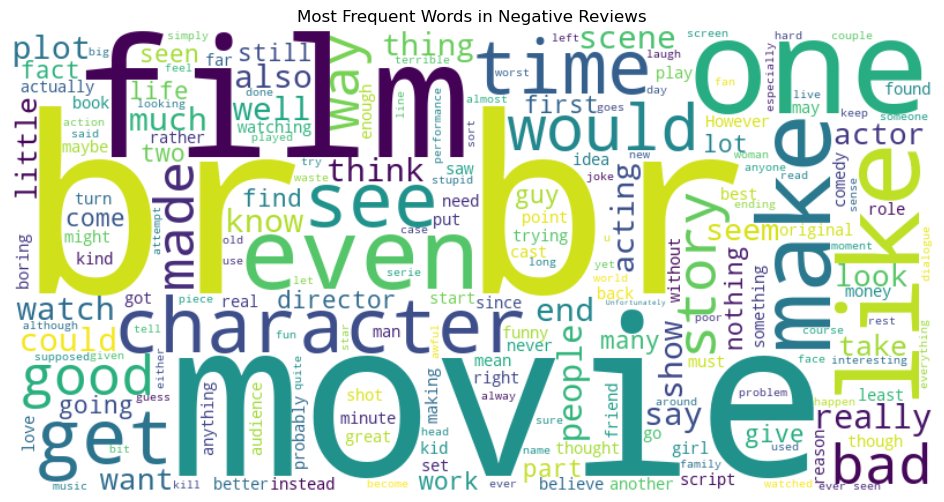

In [15]:
# Separate positive and negative reviews
positive_text = " ".join(df[df['sentiment']=='positive']['review'])
negative_text = " ".join(df[df['sentiment']=='negative']['review'])

# Stopwords
stop_words = set(stopwords.words('english'))

# Positive WordCloud
plt.figure(figsize=(12,6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Reviews")
plt.show()

# Negative WordCloud
plt.figure(figsize=(12,6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Negative Reviews")
plt.show()


In [16]:
from collections import Counter

# Tokenize and count words
all_words = " ".join(df['review']).lower().split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print("Top 20 most common words:", most_common_words)


Top 20 most common words: [('the', 638861), ('a', 316615), ('and', 313637), ('of', 286661), ('to', 264573), ('is', 204876), ('in', 179807), ('i', 141587), ('this', 138483), ('that', 130140), ('it', 129614), ('/><br', 100974), ('was', 93258), ('as', 88242), ('with', 84590), ('for', 84510), ('but', 77864), ('on', 62890), ('movie', 61492), ('are', 57009)]


In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))  # common words like 'the', 'is', removed
lemmatizer = WordNetLemmatizer()  # reduces words to their base/root form


In [19]:
def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 4. Tokenize & remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # 5. Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Return cleaned text
    return ' '.join(words)


In [20]:
# Apply cleaning function to all reviews
df['clean_review'] = df['review'].apply(clean_text)

# View sample cleaned reviews
print(df[['review', 'clean_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


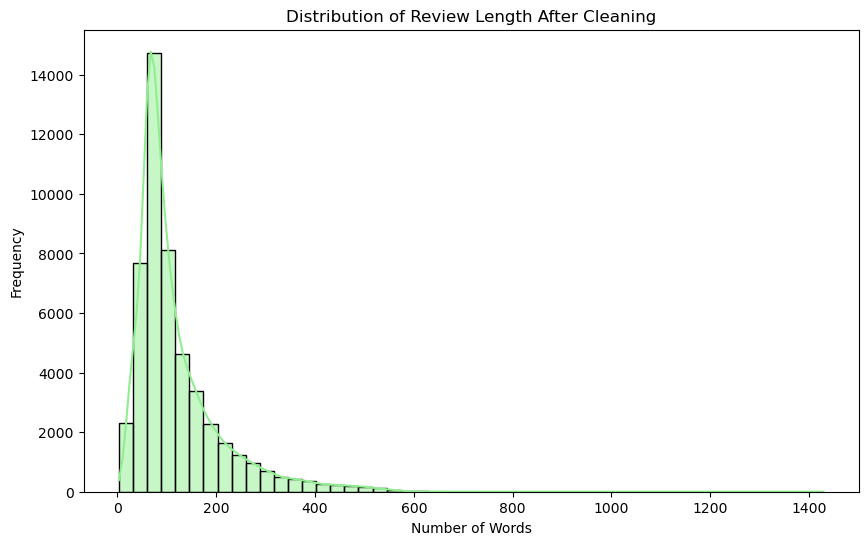

In [21]:
df['clean_length'] = df['clean_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df['clean_length'], bins=50, kde=True, color='lightgreen')
plt.title("Distribution of Review Length After Cleaning")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
# Features and Labels
X = df['clean_review']
y = df['sentiment']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # using unigrams & bigrams

# Fit on training data and transform both train & test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)


In [26]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)


In [27]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)


In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)


In [29]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("\n")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_svm, "SVM Linear")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.8891
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4340  621]
 [ 488 4551]]


--- Naive Bayes ---
Accuracy: 0.8573
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.84      0.85      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
 [[4181  780]
 [ 647 4392]]


--- SVM Linear ---
Accuracy: 0.8834
Classification Report:
               precision    recall  f1-score   support

    n

In [30]:
import joblib


In [31]:
best_model = lr  # replace with your best performing model


In [32]:
# Save the trained model
joblib.dump(best_model, "sentiment_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and TF-IDF vectorizer saved successfully!")


Model and TF-IDF vectorizer saved successfully!




# 📌 Sentiment Analysis of IMDb Movie Reviews (TF-IDF + ML) – Step-by-Step Overview

---

## **Step 1: Problem Definition**

**Purpose:** Define the problem, objectives, and impact.

**Explanation:**

* Customers leave thousands of reviews; manually analyzing them is impossible.
* Goal: Automatically classify reviews as **positive** or **negative**.
* ML + TF-IDF will learn patterns from text and predict sentiment.

**Key Takeaways:**

* Establishes **project motivation**.
* Helps in setting clear **goals for model performance** and app development.

---

## **Step 2: Load Dataset**

**Purpose:** Load the dataset and inspect it for initial understanding.

**Explanation:**

* Used **IMDb Kaggle dataset**: 50,000 reviews (balanced).
* Columns: `review` (text), `sentiment` (label).
* Checked for missing values, dataset shape, and class distribution.

**Key Takeaways:**

* Dataset is clean and balanced.
* Ready for preprocessing.

---

## **Step 3: Exploratory Data Analysis (EDA)**

**Purpose:** Understand the structure, patterns, and characteristics of the dataset.

**Explanation:**

* Analyzed review lengths → most reviews 50–300 words.
* Checked sentiment vs review length → positive reviews slightly longer.
* WordCloud analysis → frequent positive/negative words identified.
* Top frequent words confirmed patterns useful for classification.

**Key Takeaways:**

* Identified **textual patterns** for ML.
* Helped plan preprocessing steps like **stopword removal** and **lemmatization**.

---

## **Step 4: Text Preprocessing & Cleaning**

**Purpose:** Prepare text data for ML by cleaning and standardizing it.

**Explanation:**

* Lowercased text → `Good` → `good`.
* Removed HTML tags → `<br>` etc.
* Removed punctuation → avoid noise.
* Removed stopwords → words like *the, is* removed.
* Lemmatized words → `loved → love`, `running → run`.
* Stored cleaned text in `clean_review` column.

**Key Takeaways:**

* Reduces dimensionality.
* Ensures ML models focus on **meaningful words**.
* Ready for TF-IDF vectorization.

---

## **Step 5: TF-IDF Vectorization + ML Model Training**

**Purpose:** Convert text to numerical features and train models to classify sentiment.

**Explanation:**

* Split dataset: 80% train, 20% test.
* TF-IDF vectorization: converted text → numerical features.

  * `max_features=5000`, `ngram_range=(1,2)` for unigrams + bigrams.
* Trained multiple models:

  * Logistic Regression
  * Naive Bayes
  * Support Vector Machine (Linear SVC)
  * Random Forest (optional)
* Evaluated models using accuracy, precision, recall, F1-score, confusion matrix.

**Key Takeaways:**

* Logistic Regression / SVM often best for TF-IDF features.
* TF-IDF captures word importance and context (unigrams + bigrams).
* Evaluation helps select the **best-performing model** for deployment.

---

## **Step 6: Save the Best Model & TF-IDF Vectorizer**

**Purpose:** Store trained model and vectorizer for deployment in an app.

**Explanation:**

* Used `joblib` to save model → `sentiment_model.pkl`.
* Saved TF-IDF vectorizer → `tfidf_vectorizer.pkl`.
* Loaded later in app to predict new reviews.

**Key Takeaways:**

* Model + vectorizer needed to **maintain consistency** during deployment.
* Now you have a trained ML system ready for **real-time prediction**.

---

### ✅ Summary Workflow

1. Define problem → understand what and why.
2. Load dataset → check structure and balance.
3. Explore data → patterns, word distributions, lengths.
4. Clean text → remove noise, lemmatize, remove stopwords.
5. TF-IDF + ML → train models, evaluate performance.
6. Save best model → ready for app integration.

---


